In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imp

In [2]:
import plot_fncs as pf

Setting plot defaults.
Do you want to mount Osiris? (1 = yes)1
Mounting Osiris.
Do you want to load profiles.index files df? (1 = yes) 1
Loading pidxdfOG: df of all profiles.index files in path /Users/troyraen/Osiris/DMS/mesaruns/RUNS_2test_final/profile_runs/
Skipping c3 dir m1p00_stopmod1
Do you want to load metadata df? (1 = yes) 1
Loading mdf: df of metadata of all profiles in pidxdf


In [ ]:
plot_data_hold = plot_data.copy()
# plot_data.sort_values('star_age').head(20)

In [ ]:
print(plot_times[0], plot_times[-1])


In [ ]:
# isodf = pf.load_isos_from_file(fin=pf.iso_csv, cols=None)
age_range=(10**7.75,10**10.25)
plot_times = np.linspace(age_range[0],age_range[1],1000)
print(plot_times[0], plot_times[-1])

hpath = os.path.join(pf.r2tf_dir,'c1/m0p93/LOGS','history.data')
cols = ['star_age','log_Teff', 'center_h1']
df = pd.read_csv(hpath, header=4, sep='\s+', usecols=cols)
df.head()

In [ ]:
dfcp = df.copy() # save in case
dfcp = pf.cut_HR_hdf(dfcp, cuts=['ZAMS','H-3']) # only use MS
dfcp.head()


In [ ]:
pt = np.ma.masked_outside(plot_times,dfcp.star_age.min(),dfcp.star_age.max())
dftmp = pd.DataFrame({'star_age':pt, 'log_Teff':np.nan})
dftmp.head()


In [ ]:
dfcp = dfcp.loc[:,['star_age','log_Teff']].set_index('star_age')
dftmp = dftmp.set_index('star_age')
age_Teff = pd.concat([dfcp,dftmp], axis=0).sort_index()
age_Teff.head()

In [ ]:
dfcp.head()

In [ ]:
pt = np.ma.masked_outside(plot_times,dfcp.star_age.min(),dfcp.star_age.max())
pt = pt.data[pt.mask == False]
pt

In [ ]:
age_Teff = dfcon.interpolate(method='values')
tmp = age_Teff.loc[pt,:]
tmp

In [ ]:
# age_Teff

plt.figure()
plt.scatter(dfcon.index, dfcon.log_Teff, s=100, zorder=1)
plt.scatter(age_Teff.index, age_Teff.log_Teff, s=10, zorder=10)
plt.show()

In [ ]:
dfcp.head()

In [ ]:
d = pd.DataFrame({'star_age':pt, 'Teff':np.nan})
d.head()

In [ ]:
df = pf.cut_HR_hdf(df, cuts=['ZAMS','H-3']) # only use MS
age_range=(10**7.75,10**10.25)
plot_times = np.linspace(age_range[0],age_range[1],1000)
pt = np.ma.masked_outside(plot_times, df.star_age.min(),df.star_age.max())
print(pt.min(), plot_times.min())

In [ ]:
10**7.75

In [ ]:
df.star_age.min()

# Tau MS

In [ ]:
descdf = pf.get_descdf(fin=pf.fdesc) # get the descdf

In [ ]:
# PLOT delta_Tau
imp.reload(pf)

plt.rcParams["text.usetex"] = True

save = [None, pf.plotdir+'/mstau.png', pf.finalplotdir+'/mstau.png']

pf.plot_delta_tau(descdf, cctrans_frac=0.01, which='avg', save=save[2])

In [ ]:
# check core convection threshold
# PLOT mass of MS average convective core

save = [None, pf.plotdir+'/ccmass.png', pf.finalplotdir+'/ccmass.png']

pf.plot_convcore(descdf, which='avg', save=save[1])


In [ ]:
# check m(<r) of core convection when convection moves to shell
# plt.rcParams["text.usetex"] = False
cuts = ['ZAMS','TAMS']
h35 = pf.cut_HR_hdf(pf.hdfs['m3.5c6'], cuts=cuts)
h35c0 = pf.cut_HR_hdf(pf.hdfs['m3.5c0'], cuts=cuts)
h10 = pf.cut_HR_hdf(pf.hdfs['m1.0c6'], cuts=cuts)
h10c0 = pf.cut_HR_hdf(pf.hdfs['m1.0c0'], cuts=cuts)

plt.figure()
plt.plot(h35.star_age, h35.mass_conv_core, label='3.5c6')
plt.plot(h35c0.star_age, h35c0.mass_conv_core, label='3.5c0')
plt.plot(h10.star_age, h10.mass_conv_core, label='1.0c6')
plt.plot(h10c0.star_age, h10c0.mass_conv_core, label='1.0c0')
# h.plot('star_age','mass_conv_core')
plt.legend()
plt.show()

# Teff

In [ ]:
imp.reload(pf)

plt.rcParams["text.usetex"] = True

mlist = [0.8, 1.0, 2.0, 3.5, 5.0]
cblist = [4, 6]

from_file = [False, pf.get_r2tf_LOGS_dirs(masses=mlist, cbs=cblist+[0])]
                    # Only need to send this dict once. 
                    # It stores history dfs in dict hdfs (unless overwritten)
save = [None, pf.plotdir+'/Teff.png', pf.finalplotdir+'/Teff.png']

pf.plot_Teff(mlist=mlist, cblist=cblist, from_file=from_file[0], descdf=descdf, save=save[2])

# HR tracks

In [ ]:
pf.hdfs.keys()
# hdfs = pf.hdfs
# np.log10(7.92136454e+07)

In [ ]:
imp.reload(pf)

plt.rcParams["text.usetex"] = True

mlist = [0.8, 1.0, 2.0, 3.5, 5.0]
cblist = [4, 6]

from_file = [False, True, pf.get_r2tf_LOGS_dirs(masses=mlist, cbs=cblist+[0])]
                        # Only need to send this dict once. 
                        # It stores history dfs in dict hdfs (unless overwritten)
save = [None, pf.plotdir+'/tracks_testing.png', pf.finalplotdir+'/tracks.png']

pf.plot_HR_tracks(mlist=mlist, cblist=cblist, from_file=from_file[0], descdf=descdf, 
                  save=save[2])

# Isochrones

In [ ]:
# import pandas as pd
# # isodf = pf.load_isos_from_file(fin=pf.iso_csv, cols=None)
# # isodf = pf.load_isos_from_file(fin=pf.iso_csv, cols=['PrimaryEEP','EEP','cboost','log10_isochrone_age_yr'])
# isodf = pd.read_csv(pf.iso_csv, header=0, sep=',', usecols=['log10_isochrone_age_yr'])

In [ ]:
# import numpy as np
# isoages = pf.get_iso_ages(isodf)
# plot_times = [age for i,age in enumerate(isoages) if i%5==0][3:]
# print(plot_times)
# print(list(10**np.asarray(plot_times)))

In [ ]:
# isodf = pf.load_isos_from_file(fin=pf.iso_csv, cols=None)
# cbdfg = isodf.groupby('cboost')
# cbdf = cbdfg.get_group(2)
# cbdf.columns

In [ ]:
isodf = pf.load_isos_from_file(fin=pf.iso_csv, cols=None)

isoages = pf.get_iso_ages(isodf)

plot_times = [age for i,age in enumerate(isoages) if i%5==0][3:]
print(plot_times)
# plot_times = [8.284, 8.4124, 8.8618, 9.1828, 9.4396, 9.6964, 9.9532, 10.017400000000002]
# plot_times = [7.0, 7.3852, 7.642, 7.8346, 8.0272, 8.155599999999998]

In [ ]:
imp.reload(pf)

plt.rcParams["text.usetex"] = True

cb = [4,6]
for c in cb:
    save = [None, pf.plotdir+'/isos_cb'+str(c)+'_symb.png', \
            pf.finalplotdir+'/isos_cb'+str(c)+'.png']
    pf.plot_isos_ind(isodf, plot_times=plot_times, cb=c, save=save[1])


In [ ]:
cbdfg = isodf.groupby('cboost')
cbdf0 = cbdfg.get_group(0)
cbdf0.columns

In [ ]:
h1cuts[0]

In [ ]:
# plot_times = [age for i,age in enumerate(isoages)]
# for c in cb:
#     save = [None, pf.plotdir+'/isos_cb'+str(c)+'_all.png']
#     pf.plot_isos_ind(isodf, plot_times=plot_times, cb=c, save=save[1])
descdf.info()

# Hottest MS Teff

In [ ]:
# Get and store hotest Teff plot data:
# pdf = pf.get_profilesindex_df(profile_runs_dir=pf.r2tf_dir+'/')
# plot_data = pf.get_hotT_data(pdf=pdf)
# plot_data.to_csv(pf.hotTeff_csv)

Setting plot defaults.
Osiris dir is already mounted.
pidxdfOG dataframe already exists.
mdf dataframe already exists.


<IPython.core.display.Javascript object>


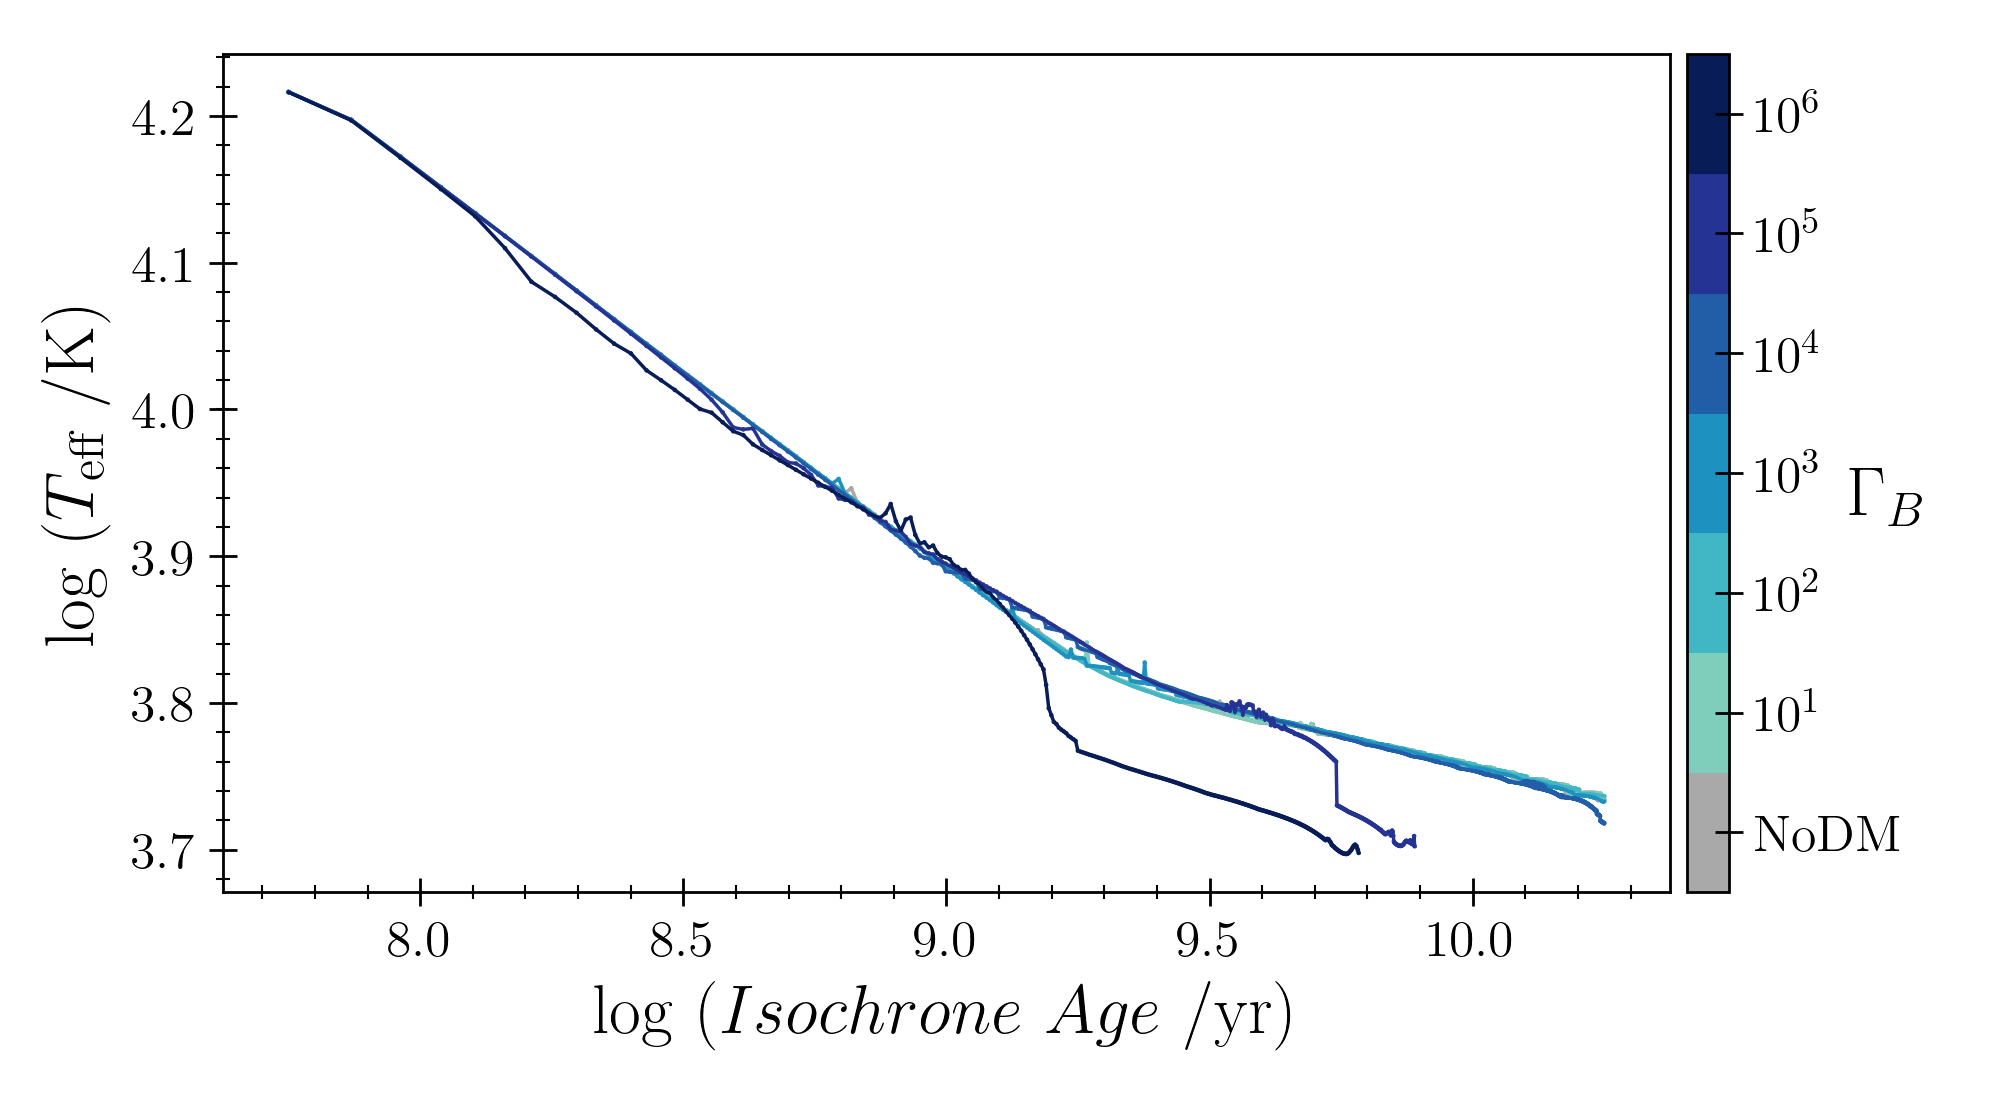

In [27]:
imp.reload(pf)

plt.rcParams["text.usetex"] = True
save = [None, pf.plotdir+'/hotTeff.png', pf.finalplotdir+'/hotTeff.png']

pf.plot_hottest_Teff(plot_data=pf.hotTeff_csv, save=save[1], resid=False)

In [ ]:
# Check Teff vs mass during MS 
# trying to explain jump in cb5 temps of hottest Teff

plt.figure(figsize=(4,3))
# descg = descdf.groupby('cboost')
# df = descg.get_group(0)
df = descdf.loc[descdf.cboost.isin([0,5]),:]
plt.scatter(df.mass, df.TAMS_Teff, s=1, c=df.cboost)
plt.show()

# this happens around the NoDm, radiative -> convective core transition which makes sense

# 3.5 Msun

In [ ]:
# MAKE THE PLOT

# cbmods = get_h1_modnums(mass=3.5)
# print(cbmods)
imp.reload(pf)

plt.rcParams["text.usetex"] = True
peeps = [ 'ZAMS', 'IAMS', 'H-3', 'H-4' ]

save = [None, pf.plotdir+'/m3p5_notitle.png', pf.finalplotdir+'/m3p5.png']
h1_legend = [False, True]

pf.plot_m3p5(peeps=peeps, h1_legend=h1_legend[0], save=save[2])

In [ ]:
# Talk plot
plt.rcParams["text.usetex"] = True
peeps = [ 'IAMS', 'H-3' ]
# peeps = [ 'ZAMS' ]
save = [None, pf.plotdir+'/m3p5_talk.png']
h1_legend = [False, True]

pf.plot_m3p5(peeps=peeps, h1_legend=h1_legend[1], talk_plot=True, save=save[1])

# 1.0 Msun

In [ ]:
# GET H1cuts MODEL NUMBERS FROM HISTORY FILE
    # SO THAT I CAN SAVE THE CORRECT PROFILES.

pidxdfOG = pf.get_profilesindex_df()

# hdf = get_hdf(0, mass=1.0)
# get_h1_modnums(frm='history_data', mass=1.0, hdf=hdf, cb=0)

# hdf = get_hdf(3, mass=1.0)
# get_h1_modnums(frm='history_data', mass=1.0, hdf=hdf, cb=3)

hdf = get_hdf(6, mass=1.0)
get_h1_modnums(frm='history_data', mass=1.0, hdf=hdf, cb=6)


In [ ]:
# m1p0c3 profiles

# pidxdfOG = get_profilesindex_df()

imp.reload(pf)

plt.rcParams["text.usetex"] = True
peeps = [ 'ZAMS', 'IAMS', 'H-2', 'H-4' ]

save = [None, pf.plotdir+ '/m1p0c3.png', pf.finalplotdir+ '/m1p0c3.png']
h1_legend = [False, True]
fix_yscale = [False, True]

pf.plot_m1p0c3(peeps=peeps, h1_legend=h1_legend[0], fix_yscale=fix_yscale[0], save=save[1])


In [ ]:
# Talk plot
plt.rcParams["text.usetex"] = True
peeps = [ 'IAMS', 'H-3' ]

save = [None, pf.plotdir+ '/m1p0c3_talk.png']
h1_legend = [False, True]
fix_yscale = [False, True]

pf.plot_m1p0c3(peeps=peeps, h1_legend=h1_legend[0], fix_yscale=fix_yscale[0], \
               talk_plot=True, save=save[1])

In [ ]:
# m1p0c6 profiles

# pidxdfOG = get_profilesindex_df()

imp.reload(pf)

plt.rcParams["text.usetex"] = True
plot_times = [ 'Time1', 'Time2', 'Time3', 'Time4', 'Time5', 'Degen' ]

h1_legend = [False, True]
fix_yscale = [False, True]

save = [None, pf.plotdir+ '/m1p0c6.png', pf.finalplotdir+ '/m1p0c6.png']
pf.plot_m1p0c6(plot_times=plot_times, h1_legend=h1_legend[0], \
               fix_yscale=fix_yscale[1], save=save[2])

save = [None, pf.plotdir+ '/m1p0c6_sbs.png', pf.finalplotdir+ '/m1p0c6_sbs.png']
pf.plot_m1p0c6_sidebyside(plot_times=plot_times, h1_legend=h1_legend[0], \
               fix_yscale=fix_yscale[1], save=save[2])


In [ ]:
imp.reload(pf)

In [ ]:
# m1p0c6 profile movies
# pf.mdf.columns
# s6 = pf.mdf[(pf.mdf['initial_mass']==1.0)&(pf.mdf['cb']==6)]
# s6 = s6[s6['star_age']>1e7].sort_values('star_age')
# s6.plot.scatter('star_age','model_number')
# plt.semilogx()
# plt.show()
plt.ioff()
plt.rcParams["text.usetex"] = True
# s6pdf = pf.plot_m1p0c6_movie() # only need to do this once
s6pdf = pf.plot_m1p0c6_movie(pdfin=s6pdf)

Setting plot defaults.
Osiris dir is already mounted.
pidxdfOG dataframe already exists.
mdf dataframe already exists.
Loading m1.0c0 history df from file. Looking for path...
Getting get_profilesindex_df()...
Skipping c3 dir m1p00_stopmod1
Found requested dir:  m1p00_stopmod1000
Loading history df from path /Users/troyraen/Osiris/DMS/mesaruns/RUNS_2test_final/profile_runs/c0/m1p00_stopmod1000/LOGS/history.data

Loading m1.0c6 history df from file. Looking for path...
Getting get_profilesindex_df()...
Skipping c3 dir m1p00_stopmod1
Found requested dir:  m1p00_stopmod2000
Loading history df from path /Users/troyraen/Osiris/DMS/mesaruns/RUNS_2test_final/profile_runs/c6/m1p00_stopmod2000/LOGS/history.data



<IPython.core.display.Javascript object>


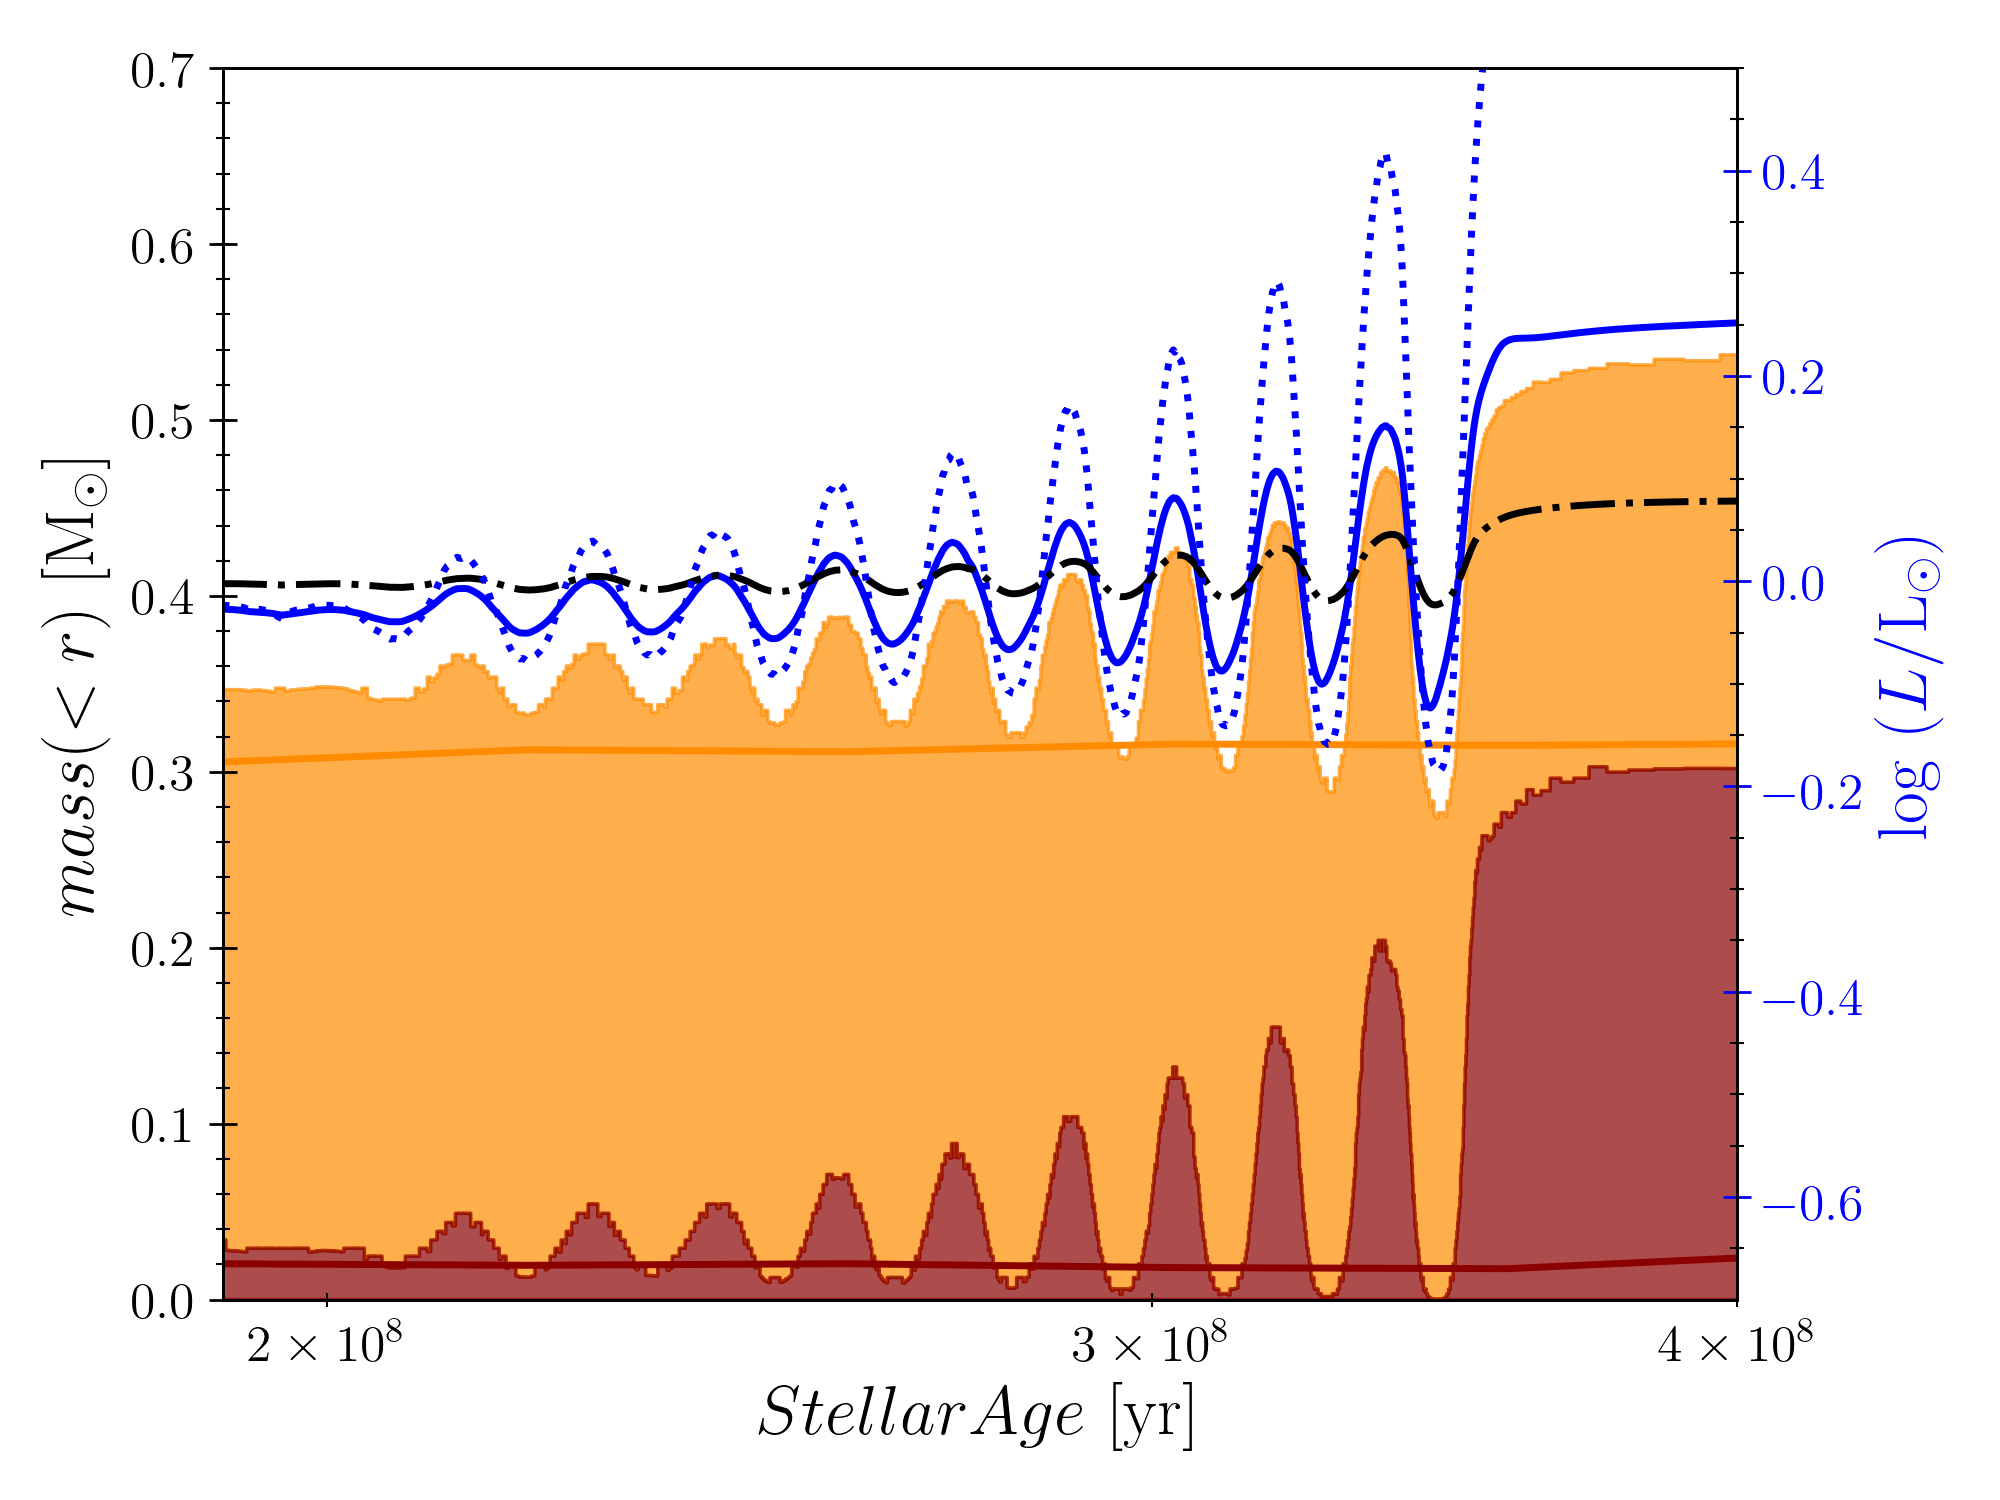

/Users/troyraen/Google_Drive/MESA/code/mesa_wimps/final_plots/plot_fncs.py:2834: FutureWarning: 'star_age' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  cols0 = bzones0.get_group(bz).sort_values('star_age')


In [33]:
# KIPP
imp.reload(pf)

plt.rcParams["text.usetex"] = True
plot_times = [ 'Time1', 'Time2', 'Time3', 'Time4', 'Time5', 'Degen' ]
from_file = ['m1p00_stopmod1000', 'm1p00_stopmod2000'] # need dirs with burning columns

save = [None, pf.plotdir+ '/m1p0c6_kipp.png', pf.finalplotdir+ '/m1p0c6_kipp.png']

pf.plot_m1p0c6_kipp(plot_times=plot_times, time_lines=False, from_file=from_file, save=save[1])


In [ ]:
# Talk plot

plt.rcParams["text.usetex"] = True
plot_times = [ 'Time1', 'Time2', 'Time3', 'Time4', 'Time5', 'Degen' ]
from_file = ['m1p00_stopmod1000', 'm1p00_stopmod2000'] # need dirs with burning columns

save = [None, pf.plotdir+ '/m1p0c6_kipp_talk.png']

pf.plot_m1p0c6_kipp(plot_times=plot_times, from_file=from_file, \
                    time_lines=False, save=save[1])


In [ ]:
imp.reload(pf)